## CHAPTER 8
---
# PERFORMING FEATURE SCALING

---
- Many machine learning algorithms are sensitive to the scale and magnitude of the features.
- In particular, the coefficients of the linear models depend on the scale of the feature, that is, changing the feature scale will change the coefficients' value. 
- In linear models, as well as algorithms that depend on distance calculations, such as clustering and principal component analysis, features with bigger value ranges tend to dominate over features with smaller ranges. 
- Thus, having features within a similar scale allows us to compare feature importance, and also helps algorithms converge faster, thus improving performance and training times. 
- We discussed the effect of feature magnitude on algorithm performance in more detail in the *Comparing feature magnitude* section of Chapter 1, *Foreseeing Variable Problems when Building ML Models*. 
- In this chapter, we will implement multiple techniques in order to set numerical variables to similar value ranges.

## 8.1 Standardizing the features

- Standardization is the process of centering the variable at zero and standardizing the variance to 1. 
- To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation:
    $z = \frac{x - mean(x)}{std(x)}$
- The result of the preceding transformation is called the **z-score** and represents how many standard deviations a given observation deviates from the mean. 
- In this recipe, we will implement standardization with scikit-learn.

In [1]:
import pandas as pd

# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
# add target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# the aim is to predict the "Median value of the houses"
# MEDV column in this dataset

# print the dataset description
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [5]:
# set up the standardization scaler
scaler = StandardScaler()

# fit the scaler to the train set
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# the scaler stores the mean of the features
scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [6]:
# the scaler also stores the standard deviation 
scaler.scale_

array([8.34141658e+00, 2.36196246e+01, 6.98393565e+00, 2.46476009e-01,
       1.15437239e-01, 7.01016354e-01, 2.79987983e+01, 2.06473886e+00,
       8.65974217e+00, 1.70351284e+02, 2.22166426e+00, 8.55009244e+01,
       7.06848020e+00])

In [7]:
# let's transform the returned NumPy arrays to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367
3,-0.394852,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896
4,-0.391456,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596


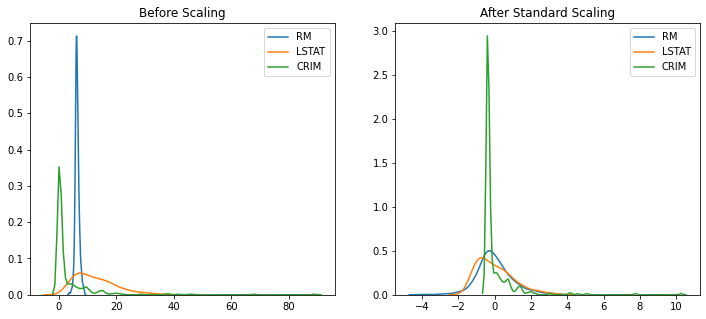

In [8]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

Note from the above plots how standardization centered all the distributions at zero, but it preserved their original distribution. The value range is not identical, but it looks more homogeneous across the variables. 

Note something interesting in the plot below

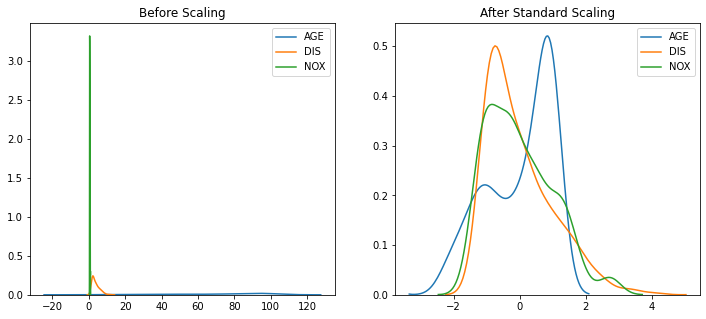

In [9]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## 8.2 Performing mean normalization

- In mean normalization, we center the variable at zero and rescale the distribution to the value range. This procedure involves subtracting the mean from each observation and then dividing the result by the difference between the minimum and maximum values: $z_{scaled} = \frac{x - mean(x)}{max(x) - min(x)}$

- This transformation results in a distribution centered at 0, with its minimum and maximum values within the range of -1 to 1.
- In this section, we will implement mean normalization with pandas and then with scikit-learn.

In [10]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scalers - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

In [11]:
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

#### Mean normalization with Pandas

In [13]:
# let's first learn the mean from the train set
means = X_train.mean(axis=0)
means

CRIM         3.358284
ZN          11.809322
INDUS       11.078757
CHAS         0.064972
NOX          0.556098
RM           6.308427
AGE         68.994068
DIS          3.762459
RAD          9.353107
TAX        401.782486
PTRATIO     18.473446
B          360.601186
LSTAT       12.440650
dtype: float64

In [14]:
# let's now get the value ranges
ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.95230
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       35.25000
dtype: float64

In [15]:
# (my addition) we can create a dataframe
df_norm = pd.DataFrame()
df_norm['mean'] = X_train.mean(axis=0)
df_norm['max'] = X_train.max(axis=0)
df_norm['min'] = X_train.min(axis=0)
df_norm['range'] = ranges
df_norm.T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
mean,3.358284,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.44065
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.98000
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.73000
range,88.969880,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.952300,23.000000,524.000000,9.400000,396.580000,35.25000


In [16]:
# now let's do mean normalization
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,-0.019441,-0.118093,0.396307,-0.064972,0.139715,-0.247064,0.319320,-0.212107,-0.232744,0.067209,0.290059,0.091530,0.623244
272,-0.036458,0.081907,-0.150981,-0.064972,-0.189503,0.043988,-0.106015,0.014156,-0.276222,-0.341188,0.013463,0.086638,-0.133635
135,-0.031477,-0.118093,0.396307,-0.064972,0.139715,0.005092,0.300782,-0.150814,-0.232744,0.067209,0.290059,0.085907,0.128209
298,-0.037020,0.581907,-0.324001,-0.064972,-0.321190,0.007008,-0.503543,0.371186,-0.189266,-0.083554,-0.390792,0.019262,-0.211933
122,-0.036701,-0.118093,0.534136,-0.064972,0.051238,-0.066570,0.246199,-0.152987,-0.319700,-0.407982,0.066655,0.044099,0.155726


#### Mean normalization with Scikit-Learn: work-around

- Set up the *StandardScaler* so that it removes the mean but does not divide by the standard deviation
- Set up the *RobustScaler* so that it does NOT remove the median but normalizes by max()-min(), important for this to set up the quantile range to 0 and 100, which represent the min and max values

In [17]:
scaler_mean = StandardScaler(with_mean=True, with_std=False)

scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# fit the scalers to the train set
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

# let's transform the returned arrays into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.019441,-0.118093,0.396307,-0.064972,0.139715,-0.247064,0.319320,-0.212107,-0.232744,0.067209,0.290059,0.091530,0.623244
1,-0.036458,0.081907,-0.150981,-0.064972,-0.189503,0.043988,-0.106015,0.014156,-0.276222,-0.341188,0.013463,0.086638,-0.133635
2,-0.031477,-0.118093,0.396307,-0.064972,0.139715,0.005092,0.300782,-0.150814,-0.232744,0.067209,0.290059,0.085907,0.128209
3,-0.037020,0.581907,-0.324001,-0.064972,-0.321190,0.007008,-0.503543,0.371186,-0.189266,-0.083554,-0.390792,0.019262,-0.211933
4,-0.036701,-0.118093,0.534136,-0.064972,0.051238,-0.066570,0.246199,-0.152987,-0.319700,-0.407982,0.066655,0.044099,0.155726


#### Visualizing the before and after

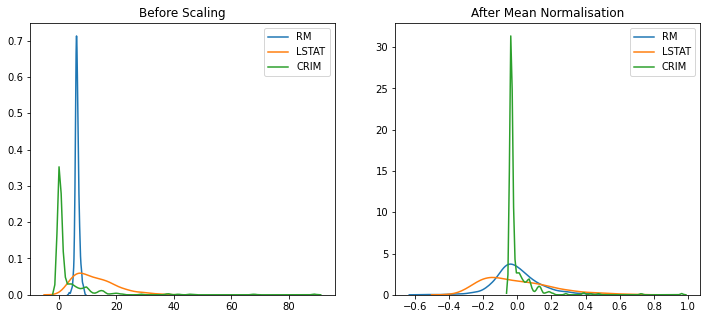

In [18]:
# visualizing the before and after
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

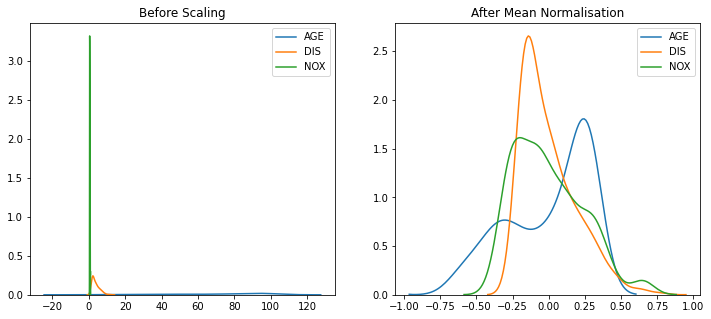

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)

plt.show()

## 8.3 Scaling to the maximum and minimum values

- Scaling to the minimum and maximum values squeezes the values of the variables between 0 and 1. 
- To implement this scaling technique, we need to subtract the minimum value from all the observations and divide the result by the value range, that is, the difference between the maximum and minimum values: $z_{scaled} = \frac{x - mean(x)}{max(x) - min(x)}$
- In this section, we will implement scaling on the minimum and maximum values by utilizing scikit-learn.

In [20]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [21]:
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

#### MinMaxScaling with Scikit-Learn

In [23]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# check out the maximum values of the features
scaler.data_max_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [24]:
# check out the minimum values of the features
scaler.min_

array([-7.10352762e-05,  0.00000000e+00, -1.68621701e-02,  0.00000000e+00,
       -7.92181070e-01, -6.82314620e-01, -2.98661174e-02, -1.07210358e-01,
       -4.34782609e-02, -3.56870229e-01, -1.34042553e+00, -8.06898986e-04,
       -4.90780142e-02])

In [25]:
# check out the value ranges (max -  min)
scaler.data_range_

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.219000e+00, 9.710000e+01, 1.095230e+01,
       2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
       3.525000e+01])

In [26]:
# (my addition) we can create a dataframe
df_norm = pd.DataFrame()
df_norm['max'] = scaler.data_max_
df_norm['min'] = scaler.min_
df_norm['range'] = scaler.data_range_
df_norm = df_norm.T
df_norm.columns = X_train.columns
df_norm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
max,88.976200,100.0,27.740000,1.0,0.871000,8.780000,100.000000,12.12650,24.000000,711.00000,22.000000,396.900000,36.980000
min,-0.000071,0.0,-0.016862,0.0,-0.792181,-0.682315,-0.029866,-0.10721,-0.043478,-0.35687,-1.340426,-0.000807,-0.049078
range,88.969880,100.0,27.280000,1.0,0.486000,5.219000,97.100000,10.95230,23.000000,524.00000,9.400000,396.580000,35.250000


In [27]:
# let's transform the arrays into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.018234,0.0,0.785557,0.0,0.491770,0.279364,1.000000,0.024214,0.130435,0.477099,0.914894,1.000000,0.927092
1,0.001217,0.2,0.238270,0.0,0.162551,0.570416,0.574665,0.250477,0.086957,0.068702,0.638298,0.995108,0.170213
2,0.006198,0.0,0.785557,0.0,0.491770,0.531519,0.981462,0.085507,0.130435,0.477099,0.914894,0.994377,0.432057
3,0.000656,0.7,0.065249,0.0,0.030864,0.533436,0.177137,0.607507,0.173913,0.326336,0.234043,0.927732,0.091915
4,0.000974,0.0,0.923387,0.0,0.403292,0.459858,0.926880,0.083334,0.043478,0.001908,0.691489,0.952569,0.459574


#### Visualizing the before and after

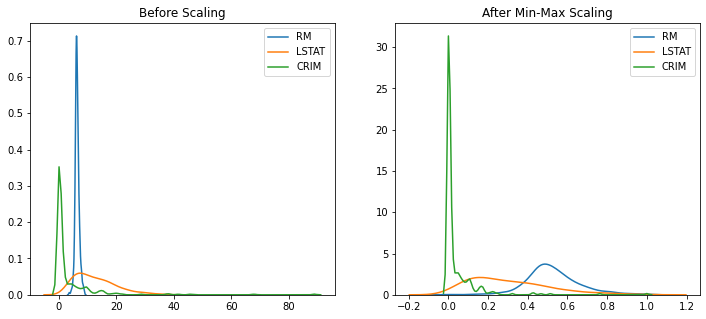

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

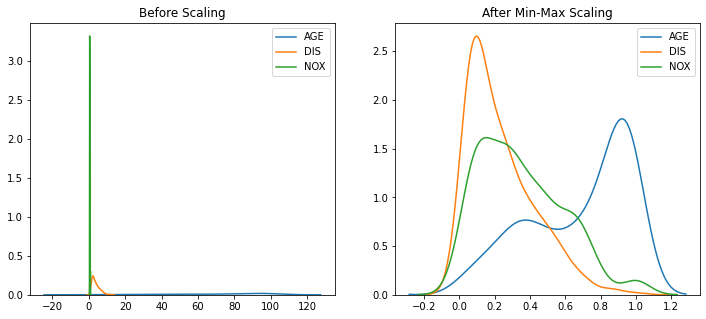

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## 8.4 Implementing maximum absolute scaling

- Maximum absolute scaling scales the data to its maximum value; that is, it divides every observation by the maximum value of the variable: 
$x_{scaled} = \frac{x}{max(x)}$
- The result of the preceding transformation is a distribution in which the values vary approximately within the range of -1 to 1. 
- In this section, we will implement maximum absolute scaling with scikit-learn.
- Scikit-learn recommends using this transformer on data that is centered at zero or on sparse data.

In [30]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

In [31]:
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

#### MaxAbsScaling

In [33]:
# set up the scaler
scaler = MaxAbsScaler()

# fit the scaler to the train set
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# view the scaler's maximum values 
scaler.max_abs_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [34]:
# let's transform the returned NumPy arrays to dataframes 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled. head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.018304,0.0,0.789113,0.0,0.716418,0.571640,1.000,0.118699,0.166667,0.614627,0.963636,1.000000,0.930503
1,0.001288,0.2,0.250901,0.0,0.532721,0.744647,0.587,0.323053,0.125000,0.313643,0.845455,0.995112,0.209032
2,0.006269,0.0,0.789113,0.0,0.716418,0.721526,0.982,0.174057,0.166667,0.614627,0.963636,0.994381,0.458626
3,0.000727,0.7,0.080750,0.0,0.459242,0.722665,0.201,0.645512,0.208333,0.503516,0.672727,0.927790,0.134397
4,0.001045,0.0,0.924658,0.0,0.667049,0.678929,0.929,0.172094,0.083333,0.264416,0.868182,0.952608,0.484857


#### Visualizing the before and after

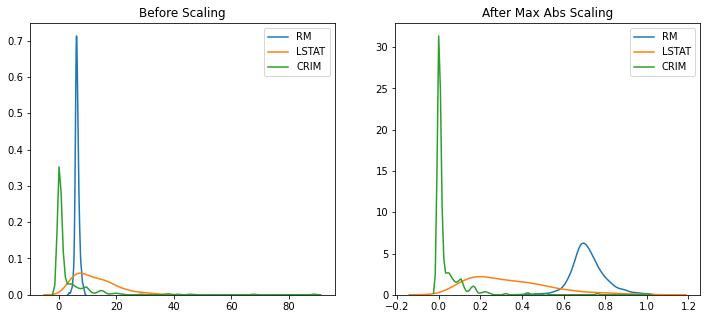

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

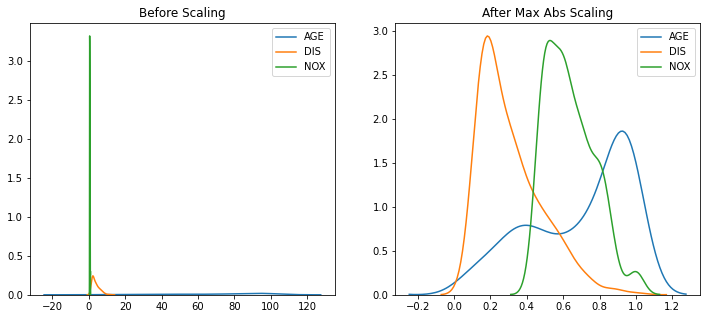

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

#### Centering and MaxAbsScaling

We can center the distributions at zero and then scale to its absolute maximum (as recommended by Scikit-learn) by combining the use of 2 transformers.

In [37]:
# set up the modified StandardScaler 
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler 
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set
scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

# do dataframing
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.019439,-0.118093,0.389735,-0.064972,0.077958,-0.146860,0.310059,-0.191569,-0.223046,0.049532,0.123934,0.091456,0.594087
1,-0.036456,0.081907,-0.148477,-0.064972,-0.105739,0.026147,-0.102941,0.012785,-0.264713,-0.251452,0.005752,0.086568,-0.127384
2,-0.031475,-0.118093,0.389735,-0.064972,0.077958,0.003027,0.292059,-0.136211,-0.223046,0.049532,0.123934,0.085837,0.122211
3,-0.037017,0.581907,-0.318629,-0.064972,-0.179217,0.004166,-0.488941,0.335244,-0.181379,-0.061579,-0.166975,0.019246,-0.202019
4,-0.036699,-0.118093,0.525279,-0.064972,0.028590,-0.039570,0.239059,-0.138173,-0.306379,-0.300679,0.028480,0.044064,0.148441


#### Visualizing centered MaxAbsScaling

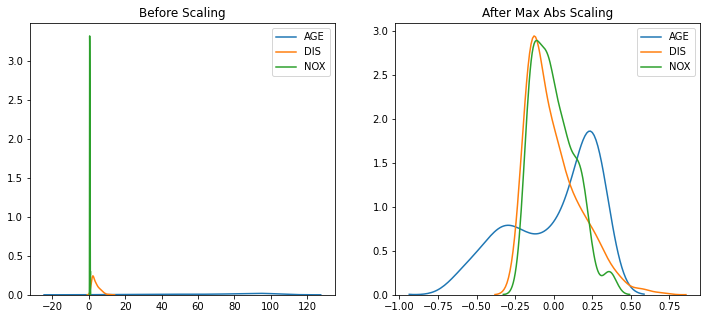

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## 8.5 Scaling with the median and quantiles

- When scaling variables to the median and quantiles, the median value is removed from the observations and the result is divided by the inter-quartile range (IQR). 
- The IQR is the range between the 1st quartile and the 3rd quartile, or, in other words, the range between the 25th quantile and the 75th quantile: $x_{scaled} = \frac{x - median(x)}{75thQuantile(x) - 25thQuantile(x)}$
- This method is known as *robust scaling* because it produces more robust estimates for the center and value range of the variable, and is recommended if the data contains outliers. 
- In this section, we will implement scaling with the median and IQR by utilizing Scikit-Learn.

In [39]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

In [40]:
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

#### RobustScaling

In [42]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# view the scaler's median values 
scaler.center_

array([2.62660e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.21550e+00, 7.94500e+01, 3.21570e+00, 5.00000e+00, 3.11000e+02,
       1.91000e+01, 3.91605e+02, 1.11600e+01])

In [43]:
# view the scaler's IQR values
scaler.scale_

array([3.030275e+00, 2.000000e+01, 1.315000e+01, 1.000000e+00,
       1.792500e-01, 7.520000e-01, 4.857500e+01, 2.971650e+00,
       2.000000e+01, 3.900000e+02, 2.800000e+00, 1.963250e+01,
       9.982500e+00])

In [44]:
# let's transform arrays into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.450778,0.0,1.013688,0.0,0.479777,-1.591090,0.423057,-0.597749,-0.05,0.323077,0.750000,0.269706,2.329076
1,-0.048860,1.0,-0.121673,0.0,-0.412831,0.428856,-0.427174,0.236165,-0.10,-0.225641,-0.178571,0.170890,-0.343601
2,0.097391,0.0,1.013688,0.0,0.479777,0.158910,0.386001,-0.371847,-0.05,0.323077,0.750000,0.156119,0.581017
3,-0.065341,3.5,-0.480608,0.0,-0.769874,0.172207,-1.221822,1.552033,0.00,0.120513,-1.535714,-1.190118,-0.620085
4,-0.055992,0.0,1.299620,0.0,0.239888,-0.338431,0.276891,-0.379856,-0.15,-0.315385,0.000000,-0.688399,0.678187


#### Visualization

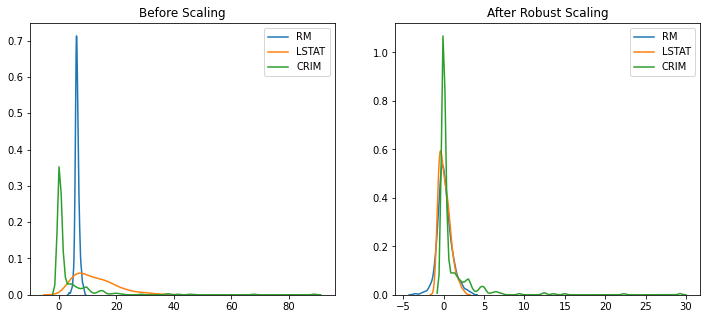

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

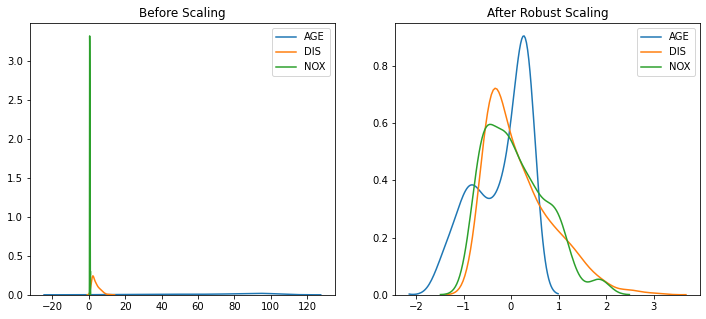

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## 8.6 Scaling to vector unit length

- Scaling to *unit norm* is achieved by dividing each feature vector by either the Manhattan distance (l1 norm) or the Euclidean distance of the vector (l2 norm): $X_{scaled-l1} = \frac{X} {l1(X)}$  and  $X_{scaled-l2} = \frac{X} {l2(X)}$
- The **Manhattan distance** is given by the sum of the absolute components of the vector: l1(X) = |x1| + |x2| + ... + |xn| whereas the **Euclidean distance** is given by the square root of the square sum of the component of the vector: l2(X) = sqr( x1^2 + x2^2 + ... + xn^2 )
- Here
    - x1 is variable 1, 
    - x2 variable 2, and 
    - xn variable n, and 
    - X is the data for 1 observation across variables (a row in other words).
- For example, let's say our data has 1 observations (1 row) and 3 variables:
    - number of pets
    - number of children
    - age
- The values for each variable for that single observation are 10, 15 and 20. 
    - Our vector X = [10, 15, 20]. Then:
    - l1(X) = 10 + 15 + 20 = 45
    - l2(X) = sqr( 10^2 + 15^2 + 20^2) = sqr( 100 + 225 + 400) = **26.9**
- The euclidean distance is always smaller than the Manhattan distance.
- The normalized vector values are therefore:
    - X_scaled_l1 = [ 10/45, 15/45, 20/45 ]      =  [0.22, 0.33, 0.44]
    - X_scaled_l2 = [10/26.9, 15/26.9, 20/26.9 ] =  [0.37, 0.55, 0.74]

In [47]:
import numpy as np
import pandas as pd

# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for robust scaling
from sklearn.preprocessing import Normalizer

In [48]:
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

#### Scaling to l1

In [50]:
# set up the scaler
scaler = Normalizer(norm='l1') 

# fit the scaler (does NOTHING)
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# view the norms for first 20 observations (original data)

np.round( np.linalg.norm(X_train, ord=1, axis=1), 1)[:20]

array([1024.1,  744. , 1003.5,  858. ,  732.4,  859.3,  845.9,  847. ,
        888.1,  826.7,  705.9,  808.9,  734. ,  784.6,  785.1,  819.6,
       1212.9, 1258. ,  757.6, 1223. ])

In [51]:
# view the norm for first 20 observations (scaled data)
np.round( np.linalg.norm(X_train_scaled, ord=1, axis=1), 1)[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

#### Scaling to l2

In [52]:
# set up the scaler
scaler = Normalizer(norm='l2')

# fit the scaler (does NOTHING)
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)